## 1. Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_style('whitegrid')

✅ Libraries loaded successfully!
📦 Pandas versiyon: 2.1.4
📦 NumPy versiyon: 1.26.4


## 2. Read Data ve Initial Inspection

In [53]:
# Veriyi oku
df = pd.read_csv('../data/raw/dataset2.csv')

print('='*60)
print('VERİ SETİ GENEL BİLGİLER')
print('='*60)
print(f'📊 Toplam satır sayısı: {len(df):,}')
print(f'📊 Toplam sütun sayısı: {len(df.columns)}')
print(f'📊 Bellek kullanımı: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'\n📋 Sütunlar:')
for i, col in enumerate(df.columns, 1):
    print(f'  {i}. {col} ({df[col].dtype})')

VERİ SETİ GENEL BİLGİLER
📊 Toplam satır sayısı: 44,513
📊 Toplam sütun sayısı: 10
📊 Bellek kullanımı: 16.29 MB

📋 Sütunlar:
  1. Unnamed: 0.1 (int64)
  2. Unnamed: 0 (int64)
  3. supermarket_name (object)
  4. price_gbp (float64)
  5. price_unit_gbp (float64)
  6. unit (object)
  7. product_name (object)
  8. capture_date (object)
  9. category_name (object)
  10. is_own_brand (bool)
📊 Bellek kullanımı: 16.29 MB

📋 Sütunlar:
  1. Unnamed: 0.1 (int64)
  2. Unnamed: 0 (int64)
  3. supermarket_name (object)
  4. price_gbp (float64)
  5. price_unit_gbp (float64)
  6. unit (object)
  7. product_name (object)
  8. capture_date (object)
  9. category_name (object)
  10. is_own_brand (bool)


In [54]:
# İlk 10 kayıt
print('📋 İlk 10 Kayıt:')
display(df.head(10))

📋 İlk 10 Kayıt:


,Unnamed: 0.1,Unnamed: 0,supermarket_name,price_gbp,price_unit_gbp,unit,product_name,capture_date,category_name,is_own_brand
0,18571,18571,Morrisons,9.0,11.97,l,19 Crimes Chardonnay,3/22/2024,drinks,False
1,18572,18572,Morrisons,9.0,11.97,l,19 Crimes Chardonnay,4/6/2024,drinks,False
2,18573,18573,Morrisons,9.0,11.97,l,19 Crimes Chardonnay,4/4/2024,drinks,False
3,91629,91629,Morrisons,8.0,10.64,l,19 Crimes Chardonnay,2/24/2024,drinks,False
4,91630,91630,Morrisons,8.0,10.64,l,19 Crimes Chardonnay,2/22/2024,drinks,False
5,91631,91631,ASDA,8.0,106.64,l,19 Crimes Chardonnay,3/22/2024,drinks,False
6,91632,91632,Morrisons,8.0,10.64,l,19 Crimes Chardonnay,2/9/2024,drinks,False
7,91633,91633,Morrisons,8.0,10.64,l,19 Crimes Chardonnay,2/28/2024,drinks,False
8,159917,159917,ASDA,9.5,126.64,l,19 Crimes Chardonnay,4/6/2024,drinks,False
9,159918,159918,ASDA,9.5,126.64,l,19 Crimes Chardonnay,4/4/2024,drinks,False


In [ ]:
df.info()

📊 Veri Yapısı Detayları:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44513 entries, 0 to 44512
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      44513 non-null  int64  
 1   Unnamed: 0        44513 non-null  int64  
 2   supermarket_name  44513 non-null  object 
 3   price_gbp         44513 non-null  float64
 4   price_unit_gbp    44506 non-null  float64
 5   unit              44506 non-null  object 
 6   product_name      44513 non-null  object 
 7   capture_date      44513 non-null  object 
 8   category_name     44513 non-null  object 
 9   is_own_brand      44513 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 3.1+ MB


In [ ]:
df.describe()

📈 İstatistiksel Özet:


,Unnamed: 0.1,Unnamed: 0,price_gbp,price_unit_gbp
count,4.451300e+04,4.451300e+04,44513.000000,44506.000000
mean,5.270100e+05,5.270100e+05,6.579549,87.686042
std,3.045013e+05,3.045013e+05,10.188919,678.559273
min,5.680000e+02,5.680000e+02,0.300000,0.010000
25%,2.622720e+05,2.622720e+05,2.000000,4.000000
50%,5.290010e+05,5.290010e+05,3.500000,8.600000
75%,7.918150e+05,7.918150e+05,7.000000,18.000000
max,1.048178e+06,1.048178e+06,160.000000,77556.000000


In [ ]:
print('Supermarkets:', df['supermarket_name'].value_counts())
print('\nCategories:', df['category_name'].value_counts())
print('\nUnits:', df['unit'].value_counts())
print('\nUnique products:', df['product_name'].nunique())
print('Date range:', df['capture_date'].min(), '-', df['capture_date'].max())

KATEGORİK SÜTUNLAR ANALİZİ

1️⃣ SÜPERMARKETLER (5 farklı):
supermarket_name
ASDA         17472
Sains        10960
Morrisons     9779
Tesco         6280
Aldi            22
Name: count, dtype: int64

2️⃣ KATEGORİLER (11 farklı):
category_name
food_cupboard      10751
drinks              9778
health_products     9671
fresh_food          3894
free-from           2172
home                2037
household           1702
frozen              1645
baby_products       1016
bakery               968
pets                 879
Name: count, dtype: int64

3️⃣ BİRİMLER (3 farklı):
unit
kg      19363
l       15720
unit     9423
Name: count, dtype: int64

4️⃣ ÜRÜN SAYISI:
Benzersiz ürün: 1579

5️⃣ TARİH ARALIĞI:
İlk tarih: 1/10/2024
Son tarih: 4/9/2024


## 3. Gereksiz Sütunları Kaldır

In [ ]:
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])

🗑️ Gereksiz sütunlar kaldırılıyor...
Silinecek sütunlar: ['Unnamed: 0.1', 'Unnamed: 0']
✅ Gereksiz sütunlar kaldırıldı.
Kalan sütun sayısı: 8
Sütunlar: ['supermarket_name', 'price_gbp', 'price_unit_gbp', 'unit', 'product_name', 'capture_date', 'category_name', 'is_own_brand']


## 4. Missing Valueleri Kontrol Et ve İşle

In [ ]:
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Column': missing_counts.index, 'Missing': missing_counts.values, 'Pct': missing_pct.values})
missing_df[missing_df['Missing'] > 0]

EKSİK DEĞER ANALİZİ

⚠️ Eksik değer bulunan sütunlar:
         Sütun  Eksik Sayı  Eksik %
price_unit_gbp           7     0.02
          unit           7     0.02

⚠️ Eksik değer bulunan sütunlar:
         Sütun  Eksik Sayı  Eksik %
price_unit_gbp           7     0.02
          unit           7     0.02


In [ ]:
if df.isnull().sum().sum() > 0:
    df[df.isnull().any(axis=1)]


🔍 Eksik değer içeren satırlar:


,supermarket_name,price_gbp,price_unit_gbp,unit,product_name,capture_date,category_name,is_own_brand
31015,Morrisons,9.5,NaN,NaN,Oyster Bay Pinot Noir,3/24/2024,drinks,False
31017,Morrisons,11.5,NaN,NaN,Oyster Bay Pinot Noir,4/3/2024,drinks,False
31018,Morrisons,9.5,NaN,NaN,Oyster Bay Pinot Noir,3/27/2024,drinks,False
31019,Morrisons,9.5,NaN,NaN,Oyster Bay Pinot Noir,3/26/2024,drinks,False
31023,Morrisons,8.5,NaN,NaN,Oyster Bay Pinot Noir,4/7/2024,drinks,False
31024,Morrisons,8.5,NaN,NaN,Oyster Bay Pinot Noir,4/6/2024,drinks,False
31026,Morrisons,9.5,NaN,NaN,Oyster Bay Pinot Noir,3/31/2024,drinks,False



📊 Toplam 7 satırda eksik değer var.


In [ ]:
initial_rows = len(df)
df = df.dropna()
print(f'Removed {initial_rows - len(df)} rows. Remaining: {len(df):,}')

🗑️ 7 eksik değer içeren satır silindi.
✅ Kalan kayıt sayısı: 44,506

✅ Kalan kayıt sayısı: 44,506


## 5. Tarih Formatını Düzelt

In [ ]:
df['capture_date'] = pd.to_datetime(df['capture_date'], format='%m/%d/%Y')
print(f'Date range: {df["capture_date"].min()} to {df["capture_date"].max()}')

📅 Tarih sütunu düzeltiliyor...
Önceki tip: object
✅ Yeni tip: datetime64[ns]

Tarih aralığı:
  Başlangıç: 09 January 2024
  Bitiş: 13 April 2024
  Gün sayısı: 95 gün


## 6. Fiyat Anomalilerini Düzelt (ASDA Hatası)

In [ ]:
# Fix ASDA price anomaly (unit prices 10x too high)
df.loc[df['supermarket_name'] == 'ASDA', 'price_unit_gbp'] = df.loc[df['supermarket_name'] == 'ASDA', 'price_unit_gbp'] / 10

🔧 ASDA fiyat anomalileri düzeltiliyor...

ASDA birim fiyat istatistikleri (düzeltme öncesi):
count    17472.000000
mean       183.508369
std       1066.154805
min          0.010000
25%          4.500000
50%          9.200000
75%         22.860000
max      77556.000000
Name: price_unit_gbp, dtype: float64

✅ ASDA birim fiyatları düzeltildi.

ASDA birim fiyat istatistikleri (düzeltme sonrası):
count    17472.000000
mean        18.350837
std        106.615480
min          0.001000
25%          0.450000
50%          0.920000
75%          2.286000
max       7755.600000
Name: price_unit_gbp, dtype: float64


In [ ]:
df.groupby('supermarket_name')['price_unit_gbp'].describe().round(2)

MARKET BAZINDA BİRİM FİYAT KARŞILAŞTIRMASI
                    count   mean     std   min   25%   50%    75%     max
supermarket_name                                                         
ASDA              17472.0  18.35  106.62  0.00  0.45  0.92   2.29  7755.6
Aldi                 22.0   4.80    3.09  3.60  3.60  3.60   3.60    12.4
Morrisons          9772.0  24.83   96.12  0.01  3.20  7.98  14.70  1400.0
Sains             10960.0  29.65  149.59  0.03  4.50  8.82  17.00  2106.0
Tesco              6280.0  20.47   72.49  0.06  3.60  8.00  16.88  1071.4


## 7. Duplike Kayıtları Temizle

In [ ]:
initial_rows = len(df)
df = df.drop_duplicates()
print(f'Removed {initial_rows - len(df):,} duplicates. Remaining: {len(df):,}')

🔍 Duplike kayıt sayısı: 11

📋 Duplike kayıt örneği:


,supermarket_name,price_gbp,price_unit_gbp,unit,product_name,capture_date,category_name,is_own_brand
1549,Tesco,2.1,4.2,kg,Alpro Vanilla Dairy Free Soya Yoghurt Alternat...,2024-01-15,fresh_food,False
1553,Tesco,2.1,4.2,kg,Alpro Vanilla Dairy Free Soya Yoghurt Alternat...,2024-01-15,fresh_food,False
8343,Tesco,3.0,3.0,l,Cawston Press Brilliant Beetroot Juice 1L,2024-01-15,fresh_food,False
8348,Tesco,3.0,3.0,l,Cawston Press Brilliant Beetroot Juice 1L,2024-01-15,fresh_food,False



🗑️ 11 duplike kayıt silindi.
✅ Kalan kayıt sayısı: 44,495


## 8. Outlierleri Tespit Et (IQR Yöntemi)

In [ ]:
Q1 = df['price_gbp'].quantile(0.25)
Q3 = df['price_gbp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price_gbp'] < lower_bound) | (df['price_gbp'] > upper_bound)]
print(f'Q1: £{Q1:.2f}, Q3: £{Q3:.2f}, IQR: £{IQR:.2f}')
print(f'Outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)')
outliers.nlargest(10, 'price_gbp')[['product_name', 'supermarket_name', 'price_gbp', 'category_name']]

AYKIRI DEĞER TESPİTİ (IQR YÖNTEMİ)
Q1 (25%): £2.00
Q3 (75%): £7.00
IQR: £5.00
Alt sınır: £-5.50
Üst sınır: £14.50

📊 Aykırı değer sayısı: 3,808 (8.56%)

📋 En yüksek fiyatlı 10 ürün:


,product_name,supermarket_name,price_gbp,category_name
30592,Oral-B iO 3 Black Electric Toothbrush,ASDA,160.0,health_products
30599,Oral-B iO 3 Black Electric Toothbrush,ASDA,160.0,health_products
30600,Oral-B iO 3 Black Electric Toothbrush,ASDA,160.0,health_products
30601,Oral-B iO 3 Black Electric Toothbrush,ASDA,160.0,health_products
30602,Oral-B iO 3 Black Electric Toothbrush,ASDA,160.0,health_products
30603,Oral-B iO 3 Black Electric Toothbrush,ASDA,160.0,home
30607,Oral-B iO 3 Black Electric Toothbrush,ASDA,160.0,health_products
30608,Oral-B iO 3 Black Electric Toothbrush,ASDA,160.0,health_products
30617,Oral-B iO 3 Black Electric Toothbrush,ASDA,160.0,health_products
30618,Oral-B iO 3 Black Electric Toothbrush,ASDA,160.0,health_products


In [ ]:
# Keep outliers (real premium products)
print(f'Total records: {len(df):,}')

ℹ️ Not: Aykırı değerler silmiyoruz, çünkü gerçek lüks/pahalı ürünler olabilir.
   (Örn: Şarap, alkol, premium gıda ürünleri)

✅ Temizlik sonrası toplam kayıt: 44,495


## 9. Özellik Mühendisliği (Feature Engineering)

In [ ]:
df['year'] = df['capture_date'].dt.year
df['month'] = df['capture_date'].dt.month
df['month_name'] = df['capture_date'].dt.month_name()
df['day'] = df['capture_date'].dt.day
df['day_of_week'] = df['capture_date'].dt.day_of_week
df['day_name'] = df['capture_date'].dt.day_name()
df['week'] = df['capture_date'].dt.isocalendar().week
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

🔧 Tarihten yeni özellikler çıkarılıyor...
✅ Tarih özellikleri eklendi:
  - year, month, month_name
  - day, day_of_week, day_name
  - week, is_weekend

📅 Ay dağılımı:
month_name
April        6431
February    13567
January     10301
March       14196
Name: count, dtype: int64


In [ ]:
cheap_threshold = df['price_gbp'].quantile(0.33)
expensive_threshold = df['price_gbp'].quantile(0.67)
df['price_category'] = pd.cut(df['price_gbp'], bins=[0, cheap_threshold, expensive_threshold, float('inf')], labels=['Cheap', 'Mid', 'Expensive'])


🏷️ Fiyat kategorisi oluşturuluyor...
✅ Fiyat kategorileri:
  - Ucuz: £0 - £2.20
  - Orta: £2.20 - £5.50
  - Pahalı: £5.50+

📊 Fiyat kategorisi dağılımı:
price_category
Orta      15309
Ucuz      14901
Pahalı    14285
Name: count, dtype: int64


In [ ]:
columns_order = ['product_name', 'supermarket_name', 'category_name', 'price_gbp', 'price_unit_gbp', 'unit', 'price_category', 'capture_date', 'year', 'month', 'month_name', 'day', 'day_of_week', 'day_name', 'week', 'is_weekend', 'is_own_brand']
df = df[columns_order]

✅ Sütun sırası düzenlendi.


## 10. Temiz Veriyi Kaydet

In [ ]:
print(f'Shape: {df.shape}')
print(f'Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'Missing values: {df.isnull().sum().sum()}')
print(f'Duplicates: {df.duplicated().sum()}')
df.info()

TEMİZ VERİ SETİ - SON DURUM
📊 Toplam satır: 44,495
📊 Toplam sütun: 17
📊 Bellek: 20.02 MB

📋 Sütunlar:
  1. product_name (object)
  2. supermarket_name (object)
  3. category_name (object)
  4. price_gbp (float64)
  5. price_unit_gbp (float64)
  6. unit (object)
  7. price_category (category)
  8. capture_date (datetime64[ns])
  9. year (int32)
  10. month (int32)
  11. month_name (object)
  12. day (int32)
  13. day_of_week (int32)
  14. day_name (object)
  15. week (UInt32)
  16. is_weekend (int32)
  17. is_own_brand (bool)

✅ Eksik değer: 0
✅ Duplike kayıt: 0


In [ ]:
df.head()


📋 Temiz veriden ilk 5 kayıt:


,product_name,supermarket_name,category_name,price_gbp,price_unit_gbp,unit,price_category,capture_date,year,month,month_name,day,day_of_week,day_name,week,is_weekend,is_own_brand
0,19 Crimes Chardonnay,Morrisons,drinks,9.0,11.97,l,Pahalı,2024-03-22,2024,3,March,22,4,Friday,12,0,False
1,19 Crimes Chardonnay,Morrisons,drinks,9.0,11.97,l,Pahalı,2024-04-06,2024,4,April,6,5,Saturday,14,1,False
2,19 Crimes Chardonnay,Morrisons,drinks,9.0,11.97,l,Pahalı,2024-04-04,2024,4,April,4,3,Thursday,14,0,False
3,19 Crimes Chardonnay,Morrisons,drinks,8.0,10.64,l,Pahalı,2024-02-24,2024,2,February,24,5,Saturday,8,1,False
4,19 Crimes Chardonnay,Morrisons,drinks,8.0,10.64,l,Pahalı,2024-02-22,2024,2,February,22,3,Thursday,8,0,False


In [ ]:
output_path = '../data/processed/cleaned_data.csv'
df.to_csv(output_path, index=False)
print(f'Saved: {output_path}')

💾 Temiz veri kaydedildi: ../data/processed/cleaned_data.csv
✅ Dosya boyutu: 26.15 MB
✅ Dosya boyutu: 26.15 MB


## 1. Load Libraries

In [ ]:
# Veri İşleme
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Tarih işlemleri
from datetime import datetime

# Uyarıları gizle
import warnings
warnings.filterwarnings('ignore')

# Visualization ayarları
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_style('whitegrid')

print('✅ Libraries loaded successfully!')
print(f'📦 Pandas versiyon: {pd.__version__}')
print(f'📦 NumPy versiyon: {np.__version__}')

✅ Libraries loaded successfully!


## 2. Read Data

## 3. Initial Inspection - Veri Yapısı

In [ ]:
# İlk 10 kayıt
print('📋 İlk 10 Kayıt:')
display(df.head(10))

In [ ]:
# Veriyi oku
df = pd.read_csv('../data/raw/dataset2.csv')

print('='*60)
print('VERİ SETİ GENEL BİLGİLER')
print('='*60)
print(f'📊 Toplam satır sayısı: {len(df):,}')
print(f'📊 Toplam sütun sayısı: {len(df.columns)}')
print(f'📊 Bellek kullanımı: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'\n📋 Sütunlar:')
for i, col in enumerate(df.columns, 1):
    print(f'  {i}. {col} ({df[col].dtype})')

Veri boyutu: (9994, 6)
Toplam kayıt: 9994
Toplam sütun: 6


In [ ]:
# İlk 5 kayıt
print('İlk 5 Kayıt:')
df.head()

İlk 5 Kayıt:


,urun_adi,fiyat,kategori,market_adi,tarih,marka
0,Soda,15.88,İçecek,A101,2025-07-30,Beypazarı
1,Ayran,11.46,Süt & Süt Ürünleri,A101,2025-08-23,Sütaş
2,Çay,91.63,İçecek,BİM,2025-01-01,Lipton
3,Kraker,17.90,Atıştırmalık,Migros,2025-03-16,Eti
4,Reçel,75.01,Kahvaltılık,ŞOK,2025-05-12,Fiskobirlik


In [ ]:
# Veri yapısı
print('Veri Yapısı:')
df.info()

Veri Yapısı:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   urun_adi    9994 non-null   object 
 1   fiyat       9994 non-null   float64
 2   kategori    9994 non-null   object 
 3   market_adi  9994 non-null   object 
 4   tarih       9994 non-null   object 
 5   marka       9994 non-null   object 
dtypes: float64(1), object(5)
memory usage: 468.6+ KB


In [ ]:
# İstatistiksel özet
print('İstatistiksel Özet:')
df.describe()

İstatistiksel Özet:


,fiyat
count,9994.000000
mean,75.051346
std,62.370991
min,8.110000
25%,30.472500
50%,54.830000
75%,102.412500
max,399.500000


In [ ]:
# Sütun isimleri
print('Sütunlar:')
print(df.columns.tolist())

Sütunlar:
['urun_adi', 'fiyat', 'kategori', 'market_adi', 'tarih', 'marka']


## 4. Missing Valueleri Kontrol Et

In [ ]:
# Eksik değer sayısı
print('Missing Value Sayısı:')
print(df.isnull().sum())
print('\n' + '='*50)

# Eksik değer yüzdesi
print('\nMissing Value Yüzdesi:')
missing_percentage = (df.isnull().sum() / len(df) * 100).round(2)
print(missing_percentage[missing_percentage > 0])

if df.isnull().sum().sum() == 0:
    print('\n✅ Eksik değer yok!')
else:
    print(f'\n⚠️ Toplam {df.isnull().sum().sum()} eksik değer bulundu!')

Missing Value Sayısı:
urun_adi      0
fiyat         0
kategori      0
market_adi    0
tarih         0
marka         0
dtype: int64


Missing Value Yüzdesi:
Series([], dtype: float64)

✅ Eksik değer yok!


In [ ]:
# Eksik değerleri temizle (eğer varsa)
initial_rows = len(df)
df = df.dropna()
removed_rows = initial_rows - len(df)

if removed_rows > 0:
    print(f'🗑️ {removed_rows} eksik değer içeren satır silindi.')
else:
    print('✅ Silinecek eksik değer yok.')

print(f'Kalan kayıt sayısı: {len(df)}')

✅ Silinecek eksik değer yok.
Kalan kayıt sayısı: 9994


## 5. Duplicate Recordları Temizle

In [ ]:
# Tekrarlı kayıt kontrolü
duplicates = df.duplicated().sum()
print(f'Tekrarlı kayıt sayısı: {duplicates}')

if duplicates > 0:
    df = df.drop_duplicates()
    print(f'🗑️ {duplicates} tekrarlı kayıt silindi.')
else:
    print('✅ Tekrarlı kayıt yok.')

print(f'Kalan kayıt sayısı: {len(df)}')

Tekrarlı kayıt sayısı: 0
✅ Tekrarlı kayıt yok.
Kalan kayıt sayısı: 9994


## 6. Fix Data Types

In [ ]:
# Tarih sütununu datetime'a çevir
df['tarih'] = pd.to_datetime(df['tarih'])
print('✅ Tarih sütunu datetime formatına çevrildi.')

# Fiyat sütununun sayısal olduğundan emin ol
df['fiyat'] = pd.to_numeric(df['fiyat'], errors='coerce')
print('✅ Fiyat sütunu sayısal formata çevrildi.')

# Kategorik sütunları string'e çevir
df['urun_adi'] = df['urun_adi'].astype(str)
df['kategori'] = df['kategori'].astype(str)
df['market_adi'] = df['market_adi'].astype(str)
df['marka'] = df['marka'].astype(str)
print('✅ Kategorik sütunlar string formatına çevrildi.')

✅ Tarih sütunu datetime formatına çevrildi.
✅ Fiyat sütunu sayısal formata çevrildi.
✅ Kategorik sütunlar string formatına çevrildi.

✅ Fiyat sütunu sayısal formata çevrildi.
✅ Kategorik sütunlar string formatına çevrildi.


In [ ]:
# Güncellenmiş veri yapısı
print('Güncellenmiş Veri Yapısı:')
df.info()

Güncellenmiş Veri Yapısı:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   urun_adi    9994 non-null   object        
 1   fiyat       9994 non-null   float64       
 2   kategori    9994 non-null   object        
 3   market_adi  9994 non-null   object        
 4   tarih       9994 non-null   datetime64[ns]
 5   marka       9994 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 468.6+ KB


## 7. Outlierleri Tespit Et (Outlier Detection)

In [ ]:
# IQR (Interquartile Range) metoduyla aykırı değer tespiti
Q1 = df['fiyat'].quantile(0.25)
Q3 = df['fiyat'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Price Statistics:')
print(f'Q1 (25%): {Q1:.2f} TL')
print(f'Q3 (75%): {Q3:.2f} TL')
print(f'IQR: {IQR:.2f} TL')
print(f'\nOutlier Sınırları:')
print(f'Alt sınır: {lower_bound:.2f} TL')
print(f'Üst sınır: {upper_bound:.2f} TL')

# Aykırı değerleri bul
outliers = df[(df['fiyat'] < lower_bound) | (df['fiyat'] > upper_bound)]
print(f'\n⚠️ Aykırı değer sayısı: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)')

Price Statistics:
Q1 (25%): 30.47 TL
Q3 (75%): 102.41 TL
IQR: 71.94 TL

Outlier Sınırları:
Alt sınır: -77.44 TL
Üst sınır: 210.32 TL

⚠️ Aykırı değer sayısı: 424 (4.24%)


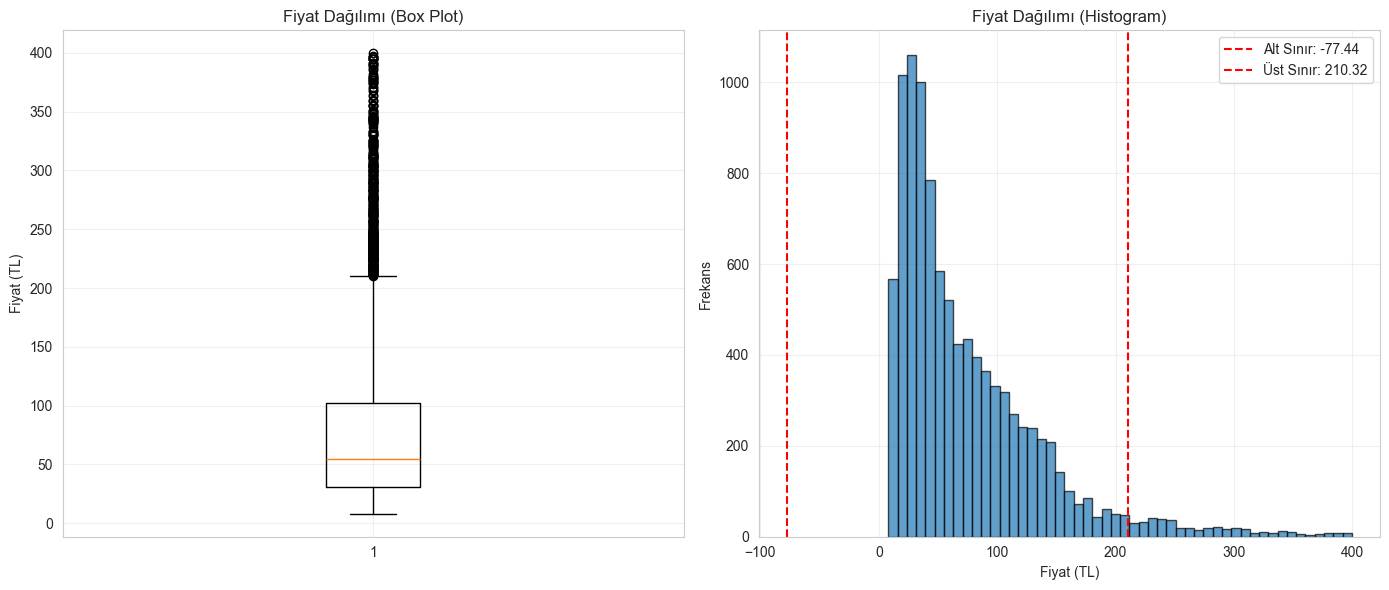

✅ Plot saved: outputs/figures/01_outlier_detection.png


In [ ]:
# Aykırı değerleri görselleştir
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['fiyat'])
plt.title('Fiyat Dağılımı (Box Plot)')
plt.ylabel('Fiyat (TL)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df['fiyat'], bins=50, edgecolor='black', alpha=0.7)
plt.axvline(lower_bound, color='r', linestyle='--', label=f'Alt Sınır: {lower_bound:.2f}')
plt.axvline(upper_bound, color='r', linestyle='--', label=f'Üst Sınır: {upper_bound:.2f}')
plt.title('Fiyat Dağılımı (Histogram)')
plt.xlabel('Fiyat (TL)')
plt.ylabel('Frekans')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/01_outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Plot saved: outputs/figures/01_outlier_detection.png')

In [ ]:
# Aykırı değerlere örnek
if len(outliers) > 0:
    print('Outlier Örnekleri:')
    print(outliers[['urun_adi', 'fiyat', 'kategori', 'market_adi']].head(10))
    
    # Not: Bu proje için aykırı değerleri SİLMİYORUZ çünkü gerçek fiyatlar olabilir
    print('\n💡 Not: Aykırı değerler veri setinde kalacak (gerçek fiyatlar olabilir)')

Outlier Örnekleri:
              urun_adi   fiyat                kategori   market_adi
18                Mama  302.44          Bebek Ürünleri          ŞOK
26                Mama  311.28          Bebek Ürünleri          ŞOK
29        Köpek Maması  231.06   Evcil Hayvan Ürünleri          BİM
58               Sucuk  234.49  Et & Tavuk & Şarküteri         A101
97               Sucuk  247.21  Et & Tavuk & Şarküteri       Migros
108         Dana Kıyma  254.96  Et & Tavuk & Şarküteri  CarrefourSA
114  Çamaşır Deterjanı  244.24                Temizlik         A101
178         Bebek Bezi  323.20          Bebek Ürünleri         A101
231         Dana Kıyma  219.10  Et & Tavuk & Şarküteri  CarrefourSA
277         Bebek Bezi  367.53          Bebek Ürünleri          BİM

💡 Not: Aykırı değerler veri setinde kalacak (gerçek fiyatlar olabilir)


## 8. Yeni Özellikler Ekle (Feature Engineering)

In [ ]:
# Tarihten yeni özellikler çıkar
df['yil'] = df['tarih'].dt.year
df['ay'] = df['tarih'].dt.month
df['ay_adi'] = df['tarih'].dt.strftime('%B')
df['gun'] = df['tarih'].dt.day
df['haftanin_gunu'] = df['tarih'].dt.dayofweek
df['gun_adi'] = df['tarih'].dt.day_name()

print('✅ Yeni tarih özellikleri eklendi:')
print('   - yil')
print('   - ay')
print('   - ay_adi')
print('   - gun')
print('   - haftanin_gunu')
print('   - gun_adi')

✅ Yeni tarih özellikleri eklendi:
   - yil
   - ay
   - ay_adi
   - gun
   - haftanin_gunu
   - gun_adi


In [ ]:
# Güncellenmiş veri yapısı
print('Yeni Sütunlarla Veri:')
df.head()

Yeni Sütunlarla Veri:


,urun_adi,fiyat,kategori,market_adi,tarih,marka,yil,ay,ay_adi,gun,haftanin_gunu,gun_adi
0,Soda,15.88,İçecek,A101,2025-07-30,Beypazarı,2025,7,July,30,2,Wednesday
1,Ayran,11.46,Süt & Süt Ürünleri,A101,2025-08-23,Sütaş,2025,8,August,23,5,Saturday
2,Çay,91.63,İçecek,BİM,2025-01-01,Lipton,2025,1,January,1,2,Wednesday
3,Kraker,17.90,Atıştırmalık,Migros,2025-03-16,Eti,2025,3,March,16,6,Sunday
4,Reçel,75.01,Kahvaltılık,ŞOK,2025-05-12,Fiskobirlik,2025,5,May,12,0,Monday


## 9. Data Quality Control

In [ ]:
# Categoriesdeki benzersiz değerler
print('Unique Values:')
print(f"Ürün sayısı: {df['urun_adi'].nunique()}")
print(f"Kategori sayısı: {df['kategori'].nunique()}")
print(f"Market sayısı: {df['market_adi'].nunique()}")
print(f"Marka sayısı: {df['marka'].nunique()}")

print('\n' + '='*50)
print('\nMarketler:')
print(df['market_adi'].value_counts())

print('\n' + '='*50)
print('\nCategories:')
print(df['kategori'].value_counts())

Unique Values:
Ürün sayısı: 86
Kategori sayısı: 16
Market sayısı: 5
Marka sayısı: 71


Marketler:
market_adi
BİM            2057
CarrefourSA    2033
ŞOK            2022
A101           1943
Migros         1939
Name: count, dtype: int64


Categories:
kategori
Kahvaltılık               799
Et & Tavuk & Şarküteri    738
Bakliyat & Tahıl          733
Atıştırmalık              710
Unlu Mamuller & Ekmek     710
Süt & Süt Ürünleri        690
İçecek                    687
Sebze & Meyve             681
Temizlik                  666
Donmuş Gıdalar            636
Kişisel Bakım             582
Baharat & Soslar          572
Bebek Ürünleri            466
Evcil Hayvan Ürünleri     452
Konserve & Hazır Gıda     438
Ev & Mutfak Gereçleri     434
Name: count, dtype: int64


In [ ]:
# Fiyat aralığı kontrolü
print('Price Statistics:')
print(f"Minimum fiyat: {df['fiyat'].min():.2f} TL")
print(f"Maksimum fiyat: {df['fiyat'].max():.2f} TL")
print(f"Ortalama fiyat: {df['fiyat'].mean():.2f} TL")
print(f"Medyan fiyat: {df['fiyat'].median():.2f} TL")
print(f"Standart sapma: {df['fiyat'].std():.2f} TL")

Price Statistics:
Minimum fiyat: 8.11 TL
Maksimum fiyat: 399.50 TL
Ortalama fiyat: 75.05 TL
Medyan fiyat: 54.83 TL
Standart sapma: 62.37 TL


## 10. Temiz Veriyi Kaydet

In [ ]:
# Temizlenmiş veriyi kaydet
output_path = '../data/processed/cleaned_data.csv'
df.to_csv(output_path, index=False, encoding='utf-8')

print(f'✅ Temizlenmiş veri kaydedildi: {output_path}')
print(f'\nFinal Veri Boyutu: {df.shape}')
print(f'Total Records: {len(df)}')
print(f'Toplam Sütun: {len(df.columns)}')

✅ Temizlenmiş veri kaydedildi: ../data/processed/cleaned_data.csv

Final Veri Boyutu: (9994, 12)
Total Records: 9994
Toplam Sütun: 12


Final Veri Boyutu: (9994, 12)
Total Records: 9994
Toplam Sütun: 12
